<a href="https://colab.research.google.com/github/Group-10-Refactory-Capstone/Group10RefactoryCapstone/blob/main/Model_training_%26_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing libraries

#This is a notebook in which data exploration and preprocessing is going to be done

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #package for visualisation
import matplotlib.pyplot as plt             #package for plotting graphs and images
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
!pip install pandas-profiling xgboost gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# 2. Loading the train data files into dataframes

In [ ]:
train_full = pd.read_csv('/content/Full_train_set.csv')

In [ ]:
train_full.head()

,Unnamed: 0,new_loanamount,new_totaldue,new_termdays,referred,good_bad_flag,New_loan_approval_delay,systemloanid,loanamount,totaldue,...,referredby,weighted_Clearance_duration,weighted_Approval_delay,weighted_Repayment_eagerness,weighted_Loan_life,bank_account_type,bank_name_clients,employment_status_clients,Age,Location
0,0,14,30,1,0,1,7.0,11.0,200000.0,242900.0,...,0.0,1.011704,2530.900000,-2.700000,31.775628,1,1,2,52.0,0.0
1,1,11,14,1,0,1,21.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,2,2,2,38.0,0.0
2,2,12,21,0,0,1,4.0,6.0,60000.0,70500.0,...,0.0,0.380737,8.166667,-1.833333,18.312057,1,0,2,39.0,0.0
3,3,10,6,0,0,1,4.0,2.0,20000.0,24500.0,...,0.0,0.169036,5.000000,-8.500000,31.775510,2,0,2,46.0,0.0
4,4,16,37,1,0,1,4.0,8.0,150000.0,188400.0,...,0.0,0.218114,7.266667,1.266667,27.895966,1,2,2,37.0,0.0


In [ ]:
train_full.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
train_full.head()

,new_loanamount,new_totaldue,new_termdays,referred,good_bad_flag,New_loan_approval_delay,systemloanid,loanamount,totaldue,termdays,referredby,weighted_Clearance_duration,weighted_Approval_delay,weighted_Repayment_eagerness,weighted_Loan_life,bank_account_type,bank_name_clients,employment_status_clients,Age,Location
0,14,30,1,0,1,7.0,11.0,200000.0,242900.0,330.0,0.0,1.011704,2530.900000,-2.700000,31.775628,1,1,2,52.0,0.0
1,11,14,1,0,1,21.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2,2,2,38.0,0.0
2,12,21,0,0,1,4.0,6.0,60000.0,70500.0,105.0,0.0,0.380737,8.166667,-1.833333,18.312057,1,0,2,39.0,0.0
3,10,6,0,0,1,4.0,2.0,20000.0,24500.0,45.0,0.0,0.169036,5.000000,-8.500000,31.775510,2,0,2,46.0,0.0
4,16,37,1,0,1,4.0,8.0,150000.0,188400.0,300.0,0.0,0.218114,7.266667,1.266667,27.895966,1,2,2,37.0,0.0


In [ ]:
test_full = pd.read_csv('/content/Full_test_set.csv')

In [ ]:
test_full.head()

,Unnamed: 0,customerid,new_loanamount,new_totaldue,new_termdays,referred,New_loan_approval_delay,systemloanid,loanamount,totaldue,...,referredby,weighted_Clearance_duration,weighted_Approval_delay,weighted_Repayment_eagerness,weighted_Loan_life,bank_account_type,bank_name_clients,employment_status_clients,Age,Location
0,0,8a858899538ddb8e015390510b321f08,0,7,1,0,70.0,3.0,26000.0,32900.0,...,0.0,7.788557,4.846154,-5.000000,30.990881,1,3,1,39.252244,3.0
1,1,8a858959537a097401537a4e316e25f7,6,37,1,0,63.0,9.0,215000.0,248400.0,...,0.0,1.901371,6.255814,2.720930,25.167874,1,3,1,39.252244,3.0
2,2,8a8589c253ace09b0153af6ba58f1f31,2,24,1,0,4.0,5.0,65000.0,79675.0,...,0.0,4.287332,19.307692,-6.846154,34.157829,2,1,2,42.000000,0.0
3,3,8a858e095aae82b7015aae86ca1e030b,4,30,1,0,2.0,7.0,120000.0,135400.0,...,0.0,0.204178,25.083333,1.666667,15.698671,1,3,1,39.252244,3.0
4,4,8a858e225a28c713015a30db5c48383d,2,24,1,0,3.0,3.0,30000.0,37500.0,...,0.0,0.194915,8.333333,2.333333,21.973333,2,1,2,48.000000,0.0


In [ ]:
test_full.drop(columns=['Unnamed: 0'], inplace=True)

###Getting the x and y values

In [ ]:
y = train_full['good_bad_flag']
x_train = train_full.drop(['good_bad_flag'], axis=1)

#3. Training

##Splitting the dataset into train and validation sets

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(x_train,y,test_size=0.3,
                                               random_state=42)
y_val

1374    1
2293    1
3379    1
1090    1
1803    1
       ..
3910    1
3414    1
1642    1
2698    1
278     1
Name: good_bad_flag, Length: 1311, dtype: int64

In [ ]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_val.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',y_train.shape)
print(f'Testing Shape y:',y_val.shape)

Training Shape x: (3057, 19)
Testing Shape x: (1311, 19)
*****___________*****___________*****
Training Shape y: (3057,)
Testing Shape y: (1311,)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(x_train)

#X_val= ss.transform(X_val)

#X_test= ss.transform(X_test)

##XgBoost model

In [ ]:
xgb1 = xgb.XGBClassifier()

# Define the parameter grid
param_grid = {'tree_method': ['exact','approx','hist'],
              'n_estimators': range(5, 15),
              'max_depth': range(2,8),
              'booster': ['gbtree', 'gblinear','dart'],
              'n_jobs': range(5, 15)}

In [ ]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:18:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

In [ ]:
best_model.score(X_train,y_train)

0.8128884527314361

In [ ]:
best_model.score(X_val,y_val)

0.7780320366132724

In [ ]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'booster': 'gbtree', 'max_depth': 3, 'n_estimators': 8, 'n_jobs': 5, 'tree_method': 'hist'}


In [ ]:
xgb_clf = xgb.XGBClassifier(tree_method='approx', n_estimators=14, max_depth=3, booster='gbtree', n_jobs=5)

xgb_clf = xgb_clf.fit(X_train, y_train)

print("Train accuracy:",xgb_clf.score(X_train,y_train))
print("Test accuracy:",xgb_clf.score(X_val,y_val))

y_pred = xgb_clf.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_val, y_pred)* 100 ,'%')
print(classification_report(y_val, xgb_clf.predict(X_val)))

Train accuracy: 0.8151782793588486
Test accuracy: 0.7833714721586575
CM: [[ 58 234]
 [ 50 969]]
Accuracy: 78.33714721586576 %
              precision    recall  f1-score   support

           0       0.54      0.20      0.29       292
           1       0.81      0.95      0.87      1019

    accuracy                           0.78      1311
   macro avg       0.67      0.57      0.58      1311
weighted avg       0.75      0.78      0.74      1311



Extracting only incorrect predictions

##SVM

In [ ]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.107, C=1.0)
svm.fit(X_train, y_train)
print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_val,y_val))

y_pred = svm.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_val, y_pred)* 100 ,'%')
print(classification_report(y_val, svm.predict(X_val)))

Train accuracy: 0.8128884527314361
Test accuracy: 0.7803203661327232
CM: [[ 26 266]
 [ 22 997]]
Accuracy: 78.03203661327231 %
              precision    recall  f1-score   support

           0       0.54      0.09      0.15       292
           1       0.79      0.98      0.87      1019

    accuracy                           0.78      1311
   macro avg       0.67      0.53      0.51      1311
weighted avg       0.73      0.78      0.71      1311



##Decision tree

In [ ]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini', class_weight='balanced')

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_val,y_val))

y_pred = decision_tree.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_val, y_pred)* 100 ,'%')
print(classification_report(y_val, decision_tree.predict(X_val)))

Train accuracy: 1.0
Test accuracy: 0.6826849733028223
CM: [[ 82 210]
 [206 813]]
Accuracy: 68.26849733028223 %
              precision    recall  f1-score   support

           0       0.28      0.28      0.28       292
           1       0.79      0.80      0.80      1019

    accuracy                           0.68      1311
   macro avg       0.54      0.54      0.54      1311
weighted avg       0.68      0.68      0.68      1311



##Random forest

In [ ]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier
#for i in range(1,20):
#Create Random Forest object
random_forest = RandomForestClassifier(n_jobs=2, class_weight='balanced', max_depth=18, max_features='log2')

#Train model
random_forest.fit(X_train, y_train)

print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_val,y_val))

y_pred = random_forest.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_val, y_pred)* 100 ,'%')
print(classification_report(y_val, random_forest.predict(X_val)))

Train accuracy: 0.9996728819103696
Test accuracy: 0.7757437070938215
CM: [[ 57 235]
 [ 59 960]]
Accuracy: 77.57437070938215 %
              precision    recall  f1-score   support

           0       0.49      0.20      0.28       292
           1       0.80      0.94      0.87      1019

    accuracy                           0.78      1311
   macro avg       0.65      0.57      0.57      1311
weighted avg       0.73      0.78      0.74      1311



##ANN

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=8, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=4, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])


In [ ]:
ann.compile(optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [ ]:
ann.build(X_train.shape)

In [ ]:
ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (3057, 8)                 160       
                                                                 
 dense_20 (Dense)            (3057, 16)                144       
                                                                 
 dense_21 (Dense)            (3057, 32)                544       
                                                                 
 dense_22 (Dense)            (3057, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (3057, 64)                0         
                                                                 
 dense_23 (Dense)            (3057, 16)                1040      
                                                                 
 dense_24 (Dense)            (3057, 4)                

In [ ]:
ann.fit(X_train,y_train,shuffle=True, batch_size=16,validation_data=[X_val, y_val], epochs=100)

Epoch 1/100
192/192 [==============================] - 3s 5ms/step - loss: 0.6532 - accuracy: 0.7540 - val_loss: 0.5470 - val_accuracy: 0.7773
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 0.5121 - accuracy: 0.7841 - val_loss: 0.5314 - val_accuracy: 0.7773
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 0.4989 - accuracy: 0.7841 - val_loss: 0.5201 - val_accuracy: 0.7773
Epoch 4/100
192/192 [==============================] - 1s 3ms/step - loss: 0.4929 - accuracy: 0.7841 - val_loss: 0.5159 - val_accuracy: 0.7773
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 0.4861 - accuracy: 0.7844 - val_loss: 0.5165 - val_accuracy: 0.7773
Epoch 6/100
192/192 [==============================] - 1s 3ms/step - loss: 0.4810 - accuracy: 0.7844 - val_loss: 0.5146 - val_accuracy: 0.7773
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 0.4798 - accuracy: 0.7867 - val_loss: 0.5072 - val_accuracy: 0.7750

#Finetune best classifier

In [ ]:
#Applying RandomForest
from sklearn.ensemble import RandomForestClassifier
#for i in range(1,20):
#Create Random Forest object
random_forest = RandomForestClassifier(n_jobs=2, class_weight='balanced', max_depth=18, max_features='log2')

#Train model
random_forest.fit(X_train, y)

print("Train accuracy:",random_forest.score(X_train,y))
#print("Test accuracy:",random_forest.score(X_val,y_val))

y_pred = random_forest.predict(X_train)

cm = confusion_matrix(y, y_pred)
print(f'CM:',cm)
#print(f'Accuracy:',accuracy_score(y, y_pred)* 100 ,'%')
print(classification_report(y, random_forest.predict(X_train)))

Train accuracy: 0.9981684981684982
CM: [[ 947    5]
 [   3 3413]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       952
           1       1.00      1.00      1.00      3416

    accuracy                           1.00      4368
   macro avg       1.00      1.00      1.00      4368
weighted avg       1.00      1.00      1.00      4368



In [ ]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   new_loanamount                4368 non-null   int64  
 1   new_totaldue                  4368 non-null   int64  
 2   new_termdays                  4368 non-null   int64  
 3   referred                      4368 non-null   int64  
 4   good_bad_flag                 4368 non-null   int64  
 5   New_loan_approval_delay       4368 non-null   float64
 6   systemloanid                  4368 non-null   float64
 7   loanamount                    4368 non-null   float64
 8   totaldue                      4368 non-null   float64
 9   termdays                      4368 non-null   float64
 10  referredby                    4368 non-null   float64
 11  weighted_Clearance_duration   4368 non-null   float64
 12  weighted_Approval_delay       4368 non-null   float64
 13  wei

In [ ]:
df_filtered = train_full[train_full['weighted_Clearance_duration'] != 0]
df_filtered = df_filtered[df_filtered['Location'] != 3]
df_filtered = df_filtered[df_filtered['weighted_Approval_delay'] <= 10000]
df_filtered.head()

,new_loanamount,new_totaldue,new_termdays,referred,good_bad_flag,New_loan_approval_delay,systemloanid,loanamount,totaldue,termdays,referredby,weighted_Clearance_duration,weighted_Approval_delay,weighted_Repayment_eagerness,weighted_Loan_life,bank_account_type,bank_name_clients,employment_status_clients,Age,Location
0,14,30,1,0,1,7.0,11.0,200000.0,242900.0,330.0,0.0,1.011704,2530.900000,-2.700000,31.775628,1,1,2,52.0,0.0
2,12,21,0,0,1,4.0,6.0,60000.0,70500.0,105.0,0.0,0.380737,8.166667,-1.833333,18.312057,1,0,2,39.0,0.0
3,10,6,0,0,1,4.0,2.0,20000.0,24500.0,45.0,0.0,0.169036,5.000000,-8.500000,31.775510,2,0,2,46.0,0.0
4,16,37,1,0,1,4.0,8.0,150000.0,188400.0,300.0,0.0,0.218114,7.266667,1.266667,27.895966,1,2,2,37.0,0.0
6,10,9,1,0,1,3.0,2.0,20000.0,24500.0,45.0,0.0,0.169444,8.000000,1.500000,19.959184,2,2,2,34.0,0.0


In [ ]:
X1 = df_filtered.drop(['good_bad_flag', 'loanamount', 'Location', 'weighted_Clearance_duration'], axis=1)
y = df_filtered['good_bad_flag']


In [ ]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='weighted_Approval_delay'>

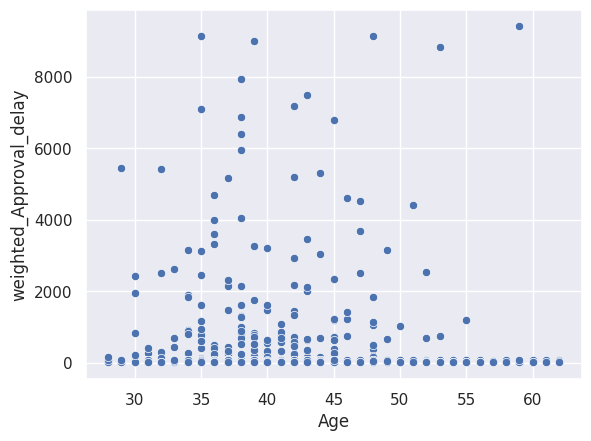

In [ ]:
sns.scatterplot( x=df_filtered['Age'], y=df_filtered['weighted_Approval_delay'])

In [ ]:
X1 = ss.fit_transform(X1)

#X_test= ss.transform(X_test)

jobs =5, depth =30 -- 0s

jobs=5, depth=20 --1s

In [ ]:
random_forest = RandomForestClassifier(n_jobs=5, class_weight='balanced', max_depth=20, max_features='sqrt')

#Train model
random_forest.fit(X1, y)

print("Train accuracy:",random_forest.score(X1,y))
#print("Test accuracy:",random_forest.score(X_val,y_val))

y_pred = random_forest.predict(X1)

cm = confusion_matrix(y, y_pred)
print(f'CM:',cm)
#print(f'Accuracy:',accuracy_score(y, y_pred)* 100 ,'%')
print(classification_report(y, random_forest.predict(X1)))

Train accuracy: 1.0
CM: [[ 710    0]
 [   0 2552]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00      2552

    accuracy                           1.00      3262
   macro avg       1.00      1.00      1.00      3262
weighted avg       1.00      1.00      1.00      3262



#Producing labels for test set

In [ ]:
def predictor(test_df, Model):
  ids = test_df['customerid']
  test_df.drop(columns=['customerid'], inplace=True)
  test_df = ss.transform(test_df)
  preds = Model.predict(test_df)
  return ids, preds

In [ ]:
X_test = pd.read_csv('/content/Full_test_set.csv')
X_test = X_test[X_test['weighted_Clearance_duration'] != 0]
X_test = X_test[X_test['weighted_Approval_delay'] <= 10000]
X_test = X_test[X_test['Location'] != 3]
X_test = X_test.drop(['loanamount', 'Location', 'weighted_Clearance_duration', 'Unnamed: 0'], axis=1)

In [ ]:
IDS, PREDS = predictor(X_test, random_forest)

In [ ]:
submission_file = pd.read_csv('/content/SampleSubmission.csv')

In [ ]:
submission_file.head()

,customerid,Good_Bad_flag
0,8a28afc7474813a40147639ec637156b,1
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1


In [ ]:
results_out = pd.DataFrame({'customerid':IDS, 'Good_Bad_flag':PREDS})

In [ ]:
results_out.head()

,customerid,Good_Bad_flag
2,8a8589c253ace09b0153af6ba58f1f31,1
4,8a858e225a28c713015a30db5c48383d,1
6,8a858e675c3fe0a1015c44ba8a037fee,1
10,8a858ec95afc0922015b0edc17e34984,1
16,8a858f5b5bee1b11015bf1b4ffea5abb,1


In [ ]:
submission_file = pd.concat([submission_file, results_out], axis=0)

In [ ]:
submission_file.to_csv('rf_out.csv', index=False)